#  Dans cette analyse, nous cherchons à étudier les salaires des métiers de l’ingénierie afin d’identifier d’abord les professions offrant les rémunérations les plus confortables. Ensuite, nous analyserons les salaires selon les villes, pour déterminer celles qui emploient le plus et qui proposent les meilleures conditions salariales pour les différents métiers. Enfin, nous observerons l’évolution des salaires selon les profils afin de mieux comprendre la progression salariale au sein de chaque métier.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/software-engineer-salaries-tr-2025/dataset_realistic.csv


# Dataset infos et visuels

In [2]:
#Création du dataframe 
salaires_ingenierie = pd.read_csv("/kaggle/input/software-engineer-salaries-tr-2025/dataset_realistic.csv")
salaires_ingenierie 

,Şehir,Seviye,Pozisyon,Maaş_Net_TL
0,Ankara,Mid,Data Science,102000
1,Istanbul,Mid,Fullstack,75000
2,Istanbul,Junior,Backend,48000
3,Diğer,Mid,Data Science,83000
4,Ankara,Junior,QA/Test,52000
...,...,...,...,...
995,Istanbul,Senior,Mobile,135000
996,Istanbul,Junior,Backend,70000
997,Diğer,Junior,Machine Learning,49000
998,Ankara,Junior,Data Science,66000


Nb : Dans le travail qui suit, nous considérons l’euro comme unité monétaire.

In [3]:
#Valeurs manquantes 

print(salaires_ingenierie.isna().sum())

Şehir          0
Seviye         0
Pozisyon       0
Maaş_Net_TL    0
dtype: int64


In [4]:
#Infos sur le dataframe 
salaires_ingenierie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Şehir        1000 non-null   object
 1   Seviye       1000 non-null   object
 2   Pozisyon     1000 non-null   object
 3   Maaş_Net_TL  1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Data Science'),
  Text(1, 0, 'Fullstack'),
  Text(2, 0, 'Backend'),
  Text(3, 0, 'QA/Test'),
  Text(4, 0, 'Game Development'),
  Text(5, 0, 'Machine Learning'),
  Text(6, 0, 'Frontend'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Mobile'),
  Text(9, 0, 'Embedded Software Developer'),
  Text(10, 0, 'UI/UX'),
  Text(11, 0, 'Product Manager'),
  Text(12, 0, 'Data Engineer'),
  Text(13, 0, 'DevOps'),
  Text(14, 0, 'Business Analyst')])

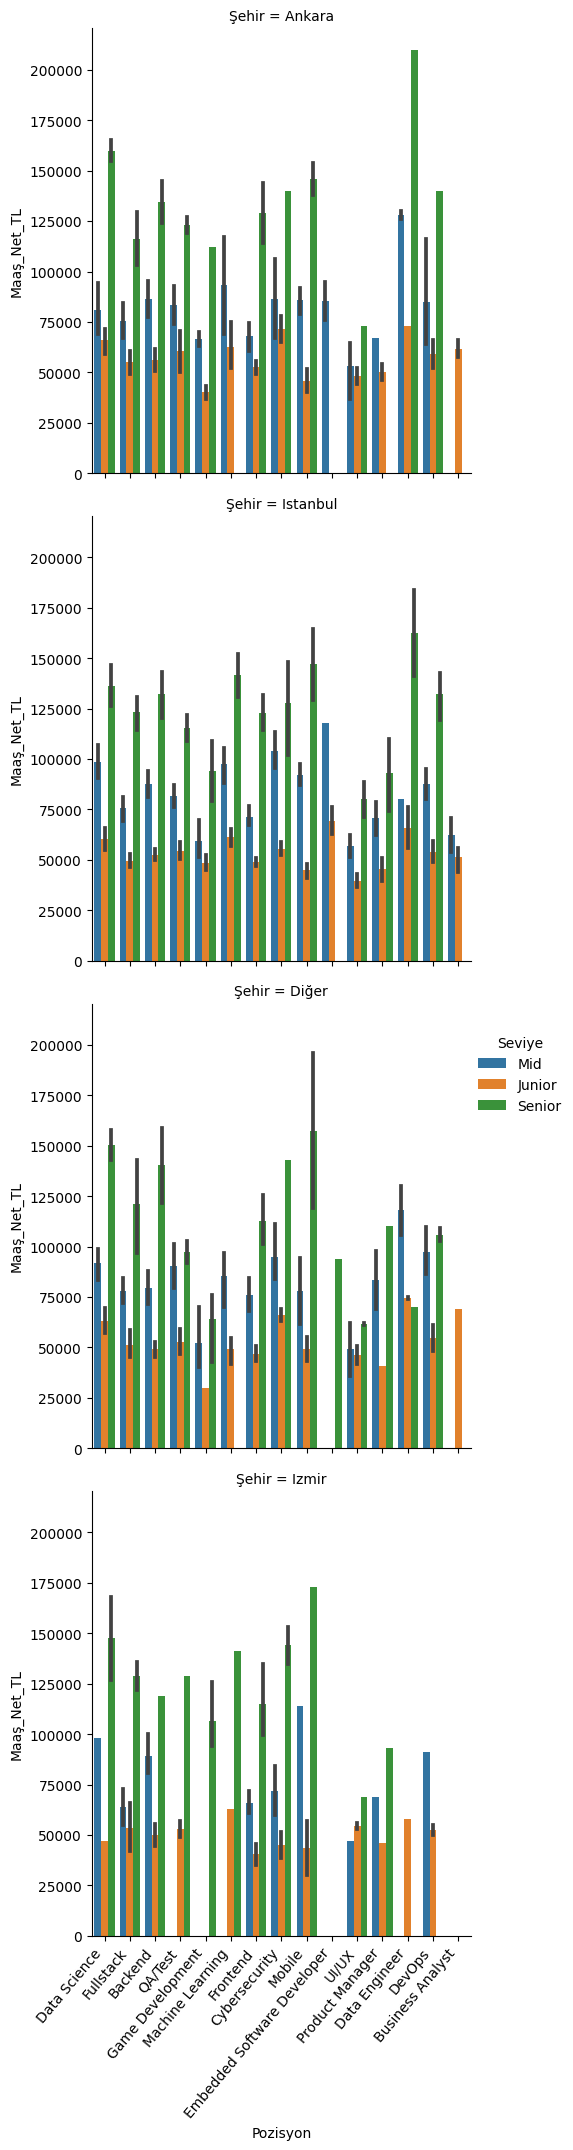

In [5]:
#Graphe des salaires par domaine, profil et ville
sns.catplot(data=salaires_ingenierie ,x="Pozisyon",y="Maaş_Net_TL",kind="bar",hue="Seviye",row="Şehir")
plt.xticks(rotation=50,ha="right")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Data Science'),
  Text(1, 0, 'Fullstack'),
  Text(2, 0, 'Backend'),
  Text(3, 0, 'QA/Test'),
  Text(4, 0, 'Game Development'),
  Text(5, 0, 'Machine Learning'),
  Text(6, 0, 'Frontend'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Mobile'),
  Text(9, 0, 'Embedded Software Developer'),
  Text(10, 0, 'UI/UX'),
  Text(11, 0, 'Product Manager'),
  Text(12, 0, 'Data Engineer'),
  Text(13, 0, 'DevOps'),
  Text(14, 0, 'Business Analyst')])

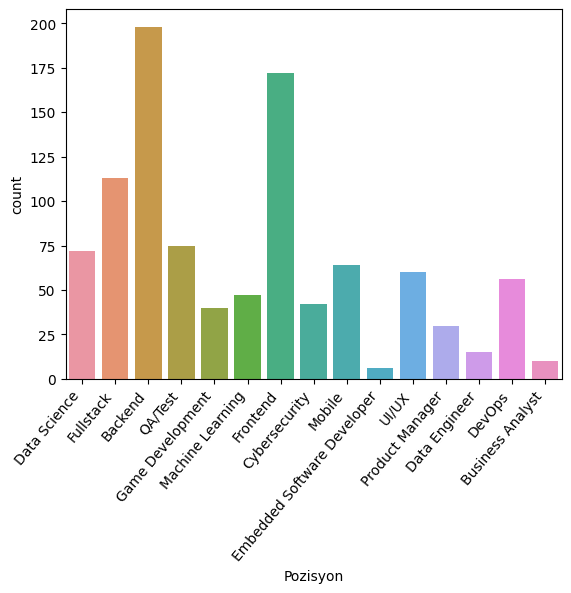

In [6]:
#Effectif des salariés par Métier
sns.countplot(data=salaires_ingenierie,x="Pozisyon")
plt.xticks(rotation=50,ha="right")

# Salaire moyens par métiers


,Métier,Salaire_moyen_Net
0,Backend,78742.0
1,Business Analyst,59500.0
2,Cybersecurity,84714.0
3,Data Engineer,105933.0
4,Data Science,90417.0
5,DevOps,80143.0
6,Embedded Software Developer,87000.0
7,Frontend,69326.0
8,Fullstack,76637.0
9,Game Development,61500.0


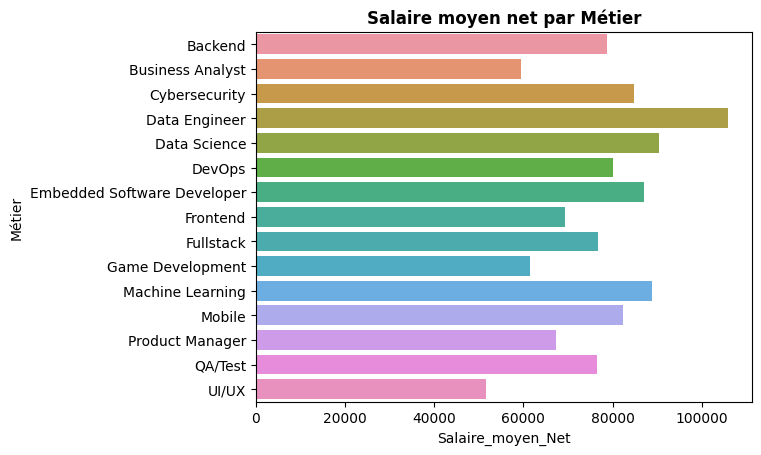

In [7]:
#Création du dataframe "salaire_moyen" et graphe en bar associé 
salaire_moyen = salaires_ingenierie.groupby("Pozisyon")["Maaş_Net_TL"].mean().round().to_dict()
salaire_moyen = {"Métier":list(salaire_moyen.keys()),
                "Salaire_moyen_Net" :list(salaire_moyen.values())}
SM = pd.DataFrame(salaire_moyen)
sns.barplot(data= SM, x="Salaire_moyen_Net", y="Métier",orient="h")
plt.title("Salaire moyen net par Métier",fontsize=12,fontweight='bold')
SM

Les résultats montrent une nette variation des salaires selon les métiers de l’ingénierie. Les postes liés à la data et à l’intelligence artificielle sont les mieux rémunérés, avec en tête les Data Engineers (105 933 €), suivis des Data Scientists (90 417 €) et des spécialistes en Machine Learning (88 915 €). Les métiers de la cybersécurité (84 714 €), du développement embarqué (87 000 €) et du DevOps (80 143 €) offrent également des salaires confortables, reflétant leur importance dans la performance et la sécurité des systèmes.

En revanche, les fonctions orientées développement web affichent des salaires plus variables : le Backend (78 742 €), le Fullstack (76 637 €) et le Frontend (69 326 €) se situent autour de la moyenne, tandis que le développement mobile (82 297 €) est légèrement au-dessus. Enfin, les postes plus fonctionnels ou créatifs comme le Business Analyst (59 500 €), le Game Development (61 500 €) et le UI/UX Design (51 733 €) présentent les rémunérations les plus faibles.

Globalement, l’analyse souligne que les compétences techniques pointues, notamment en data et en sécurité, sont les plus valorisées sur le marché.

# Salaires moyen par ville, profil et Métier

In [8]:
#Tableau croisé dynamique des postes par profil,ville et salaire moyen 
pivot_salaire = pd.pivot_table(data=salaires_ingenierie,index="Pozisyon",columns=["Seviye","Şehir"],values="Maaş_Net_TL",aggfunc="mean").round(0).fillna(0)
pivot_salaire

Seviye                        Junior                                  Mid  \
Şehir                         Ankara    Diğer Istanbul    Izmir    Ankara   
Pozisyon                                                                    
Backend                      56067.0  49062.0  52571.0  50091.0   86533.0   
Business Analyst             61750.0  69000.0  51333.0      0.0       0.0   
Cybersecurity                71500.0  66000.0  55455.0  45000.0   86500.0   
Data Engineer                73000.0  74500.0  66000.0  58000.0  128000.0   
Data Science                 65857.0  63200.0  60579.0  47000.0   80750.0   
DevOps                       59200.0  54500.0  53941.0  52500.0   84667.0   
Embedded Software Developer      0.0      0.0  69500.0      0.0   85500.0   
Frontend                     52467.0  46857.0  49061.0  40500.0   67875.0   
Fullstack                    54900.0  51429.0  49607.0  53500.0   75500.0   
Game Development             40250.0  30000.0  48308.0      0.0   66500.0   
Machine Learning             62800.0  49000.0  61167.0  63000.0   93333.0   
Mobile                       45857.0  49167.0  44833.0  43333.0   86000.0   
Product Manager              50000.0  41000.0  45375.0  46000.0   67000.0   
QA/Test                      60400.0  52571.0  54650.0  53000.0   83500.0   
UI/UX                        48400.0  46200.0  39579.0  54500.0   53250.0   

Seviye                                                       Senior            \
Şehir                           Diğer  Istanbul     Izmir    Ankara     Diğer   
Pozisyon                                                                        
Backend                       79526.0   87600.0   89333.0  134444.0  140571.0   
Business Analyst                  0.0   62500.0       0.0       0.0       0.0   
Cybersecurity                 94667.0  104111.0   72000.0  140000.0  143000.0   
Data Engineer                118000.0   80000.0       0.0  210000.0   70000.0   
Data Science                  92000.0   98400.0   98000.0  160000.0  150500.0   
DevOps                        97500.0   87429.0   91000.0  140000.0  106000.0   
Embedded Software Developer       0.0  118000.0       0.0       0.0   94000.0   
Frontend                      76125.0   71514.0   66000.0  129000.0  112833.0   
Fullstack                     78000.0   75700.0   64000.0  116250.0  121000.0   
Game Development              52250.0   59600.0       0.0  112000.0   64333.0   
Machine Learning              85333.0   97375.0       0.0       0.0       0.0   
Mobile                        78000.0   92143.0  114000.0  146000.0  157500.0   
Product Manager               83500.0   71000.0   69000.0       0.0  110000.0   
QA/Test                       90571.0   81556.0       0.0  123000.0   97500.0   
UI/UX                         49000.0   57083.0   47000.0   73000.0   61667.0   

Seviye                                           
Şehir                        Istanbul     Izmir  
Pozisyon                                         
Backend                      132333.0  119000.0  
Business Analyst                  0.0       0.0  
Cybersecurity                128000.0  144000.0  
Data Engineer                162500.0       0.0  
Data Science                 136375.0  147500.0  
DevOps                       132250.0       0.0  
Embedded Software Developer       0.0       0.0  
Frontend                     123000.0  114833.0  
Fullstack                    123316.0  129000.0  
Game Development              94000.0  106667.0  
Machine Learning             141600.0  141000.0  
Mobile                       147000.0  173000.0  
Product Manager               93200.0   93000.0  
QA/Test                      115222.0  129000.0  
UI/UX                         80000.0   69000.0

Dans la partie qui suit, nous nous intéressons à la répartition des effectifs de salariés par ville afin d’identifier les zones géographiques présentant un fort taux d’employabilité dans le secteur de l’ingénierie. L’objectif est de déterminer quelles villes concentrent le plus grand nombre de professionnels, ce qui permettra de repérer les principaux pôles d’attractivité et les marchés de l’emploi les plus dynamiques pour les métiers techniques.

<Axes: xlabel='Şehir', ylabel='count'>

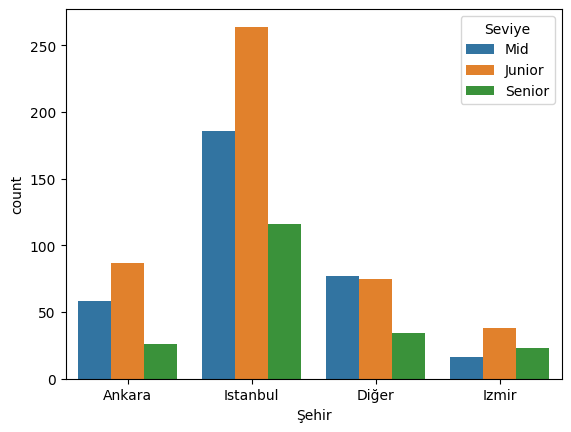

In [9]:
#Graphe des effectifs des salariés par profil et par ville 
sns.countplot(data=salaires_ingenierie,x="Şehir",hue="Seviye")

In [10]:
#Création d'un DatFrame contenant les effectifs de chaque  profil  par ville 
Junior= salaires_ingenierie[salaires_ingenierie["Seviye"]=="Junior"]
Mid= salaires_ingenierie[salaires_ingenierie["Seviye"]=="Mid"]
Senior= salaires_ingenierie[salaires_ingenierie["Seviye"]=="Senior"]
#Effectif des Juniors par ville 
Liste1 = Junior.groupby("Şehir").count().to_dict()
del Liste1["Pozisyon"]
del Liste1["Maaş_Net_TL"]
Liste1
Liste1['Effectif_Junior'] = Liste1.pop('Seviye')
df1 = pd.DataFrame(Liste1)

#Effectif des Mids par ville 
Liste2 = Mid.groupby("Şehir").count().to_dict()
del Liste2["Pozisyon"]
del Liste2["Maaş_Net_TL"]
Liste2
Liste2['Effectif_Mid'] = Liste2.pop('Seviye')
df2=pd.DataFrame(Liste2)

#Effectif des Seniors par ville 

Liste3 =Senior.groupby("Şehir").count().to_dict()
del Liste3["Pozisyon"]
del Liste3["Maaş_Net_TL"]
Liste3
Liste3['Effectif_Senior'] = Liste3.pop('Seviye')
df3 = pd.DataFrame(Liste3)

#Tableau des effectifs par profil et ville 
Effectifs_par_villes_profils = pd.concat([df1,df2,df3],axis=1)
Effectifs_par_villes_profils["total"] = Effectifs_par_villes_profils["Effectif_Junior"]+Effectifs_par_villes_profils["Effectif_Mid"]+Effectifs_par_villes_profils["Effectif_Senior"]
Effectifs_par_villes_profils["pourcentage %"] =(Effectifs_par_villes_profils["total"]/1000)*100
Effectifs_par_villes_profils

,Effectif_Junior,Effectif_Mid,Effectif_Senior,total,pourcentage %
Ankara,87,58,26,171,17.1
Diğer,75,77,34,186,18.6
Istanbul,264,186,116,566,56.6
Izmir,38,16,23,77,7.7


À ce stade de notre analyse, nous choisissons de conserver les villes d’Istanbul, Diğer et Ankara, identifiées comme celles présentant les plus forts taux d’employabilité. Ce choix se justifie par le fait qu’Istanbul concentre à elle seule près de 56 % des employés, contre 18 % pour Diğer et 17 % pour Ankara, tandis qu’Izmir ne représente qu’environ 7 %. Par ailleurs, les salaires les plus attractifs sont également plus susceptibles d’être trouvés dans ces trois principales villes.

# Salaires des métiers par ville

In [11]:
#Création d'un dataframe avec les villes les plus empolyable 
Best = salaires_ingenierie[salaires_ingenierie["Şehir"].isin(["Ankara","Diğer","Istanbul"])]

#Création du dataframe salaire_métier par ville 


Istanbul =Best[Best["Şehir"]=="Istanbul"]
Salaire_Istanbul = Istanbul.groupby("Pozisyon")["Maaş_Net_TL"].mean().round().to_dict()
Salaire_Istanbul = {"Salaire_Istanbul" : Salaire_Istanbul}
Sistan = pd.DataFrame(Salaire_Istanbul)
Sistan 

Diğer =Best[Best["Şehir"]=="Diğer"]
Salaire_Diğer = Diğer.groupby("Pozisyon")["Maaş_Net_TL"].mean().round().to_dict()
Salaire_Diğer = {"Salaire_Diğer" : Salaire_Diğer}
SD = pd.DataFrame(Salaire_Diğer)
SD

Ankara =Best[Best["Şehir"]=="Ankara"]
Salaire_Ankara = Ankara.groupby("Pozisyon")["Maaş_Net_TL"].mean().round().to_dict()
Salaire_Ankara = {"Salaire_Ankara" : Salaire_Ankara}
SA = pd.DataFrame(Salaire_Ankara)
SA 

Salaire_par_ville_Metier = pd.concat([Sistan,SD,SA],axis=1)
Salaire_par_ville_Metier = Salaire_par_ville_Metier.reset_index()
Salaire_par_ville_Metier.columns = ['Métier', 'Salaire_Istanbul','Salaire_Diğer','Salaire_Ankara']
Salaire_par_ville_Metier


,Métier,Salaire_Istanbul,Salaire_Diğer,Salaire_Ankara
0,Backend,78667.0,78095.0,85872.0
1,Business Analyst,55800.0,69000.0,61750.0
2,Cybersecurity,83957.0,93167.0,91200.0
3,Data Engineer,107400.0,91000.0,134750.0
4,Data Science,87189.0,90312.0,84923.0
5,DevOps,80844.0,84583.0,76667.0
6,Embedded Software Developer,85667.0,94000.0,85500.0
7,Frontend,69846.0,69357.0,63520.0
8,Fullstack,78299.0,74833.0,73350.0
9,Game Development,59182.0,54000.0,58000.0


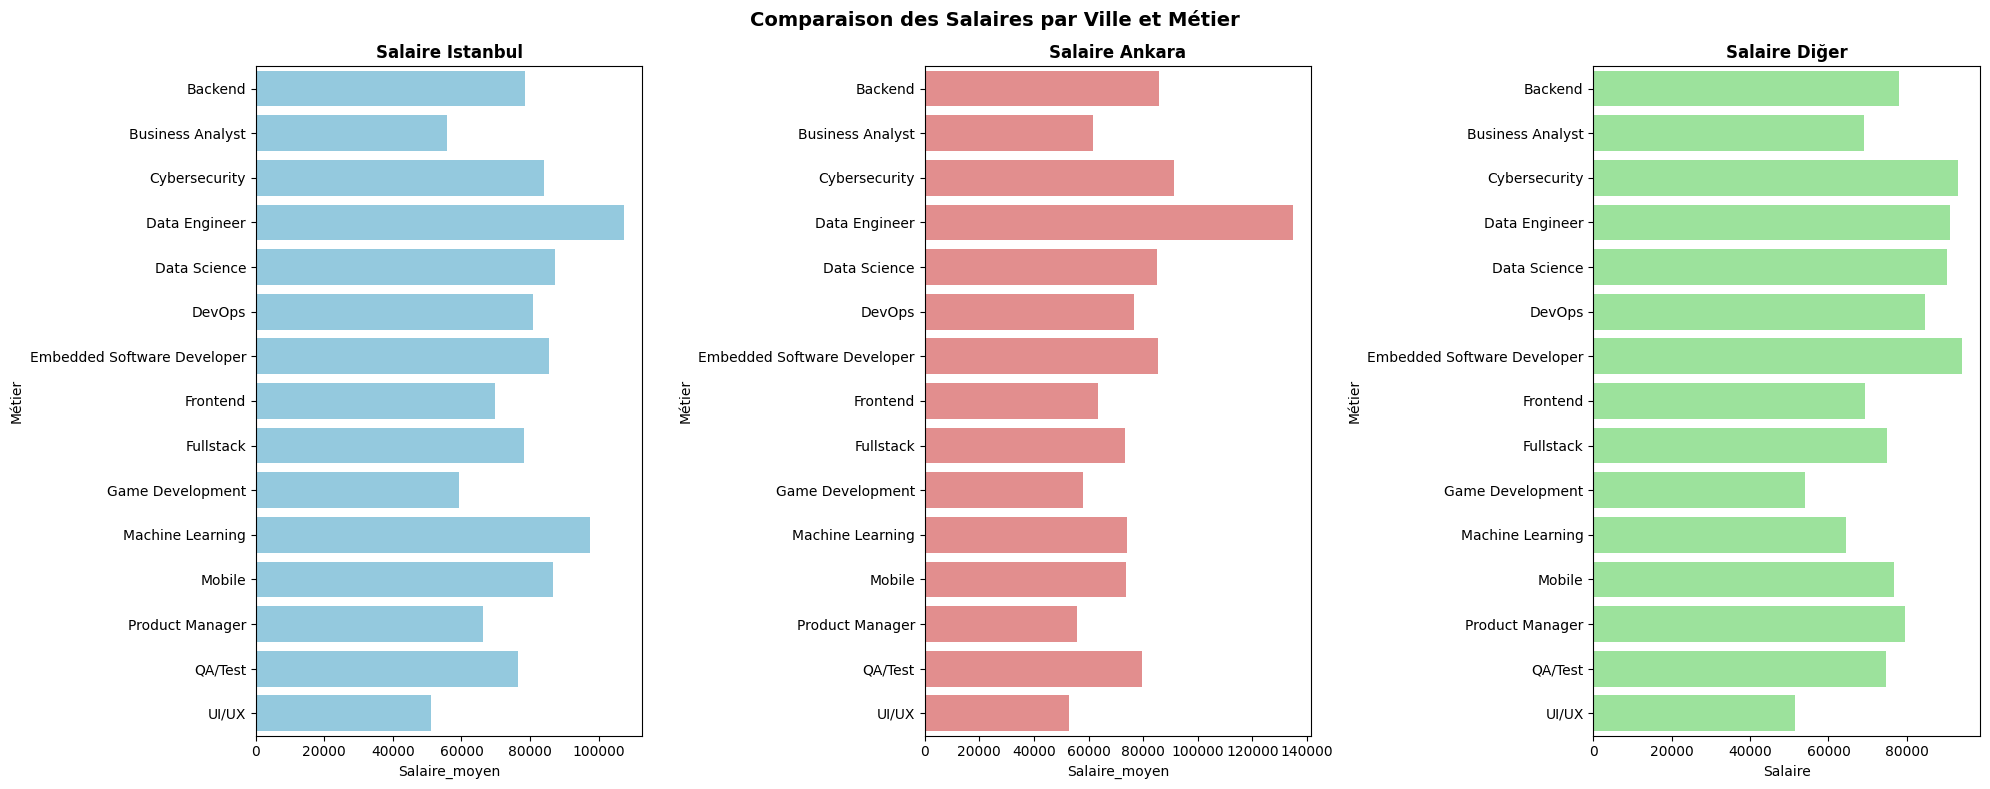

In [12]:
#Graphe comparatif des salaires par métier dans les différentes villes 

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

#Istanbul
sns.barplot(data=Salaire_par_ville_Metier, y="Métier", x="Salaire_Istanbul", 
            ax=axes[0], orient="h", color="skyblue")
axes[0].set_title("Salaire Istanbul", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Salaire_moyen")

#Ankara
sns.barplot(data=Salaire_par_ville_Metier, y="Métier", x="Salaire_Ankara", 
            ax=axes[1], orient="h", color="lightcoral")
axes[1].set_title("Salaire Ankara", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Salaire_moyen")

#Diğer
sns.barplot(data=Salaire_par_ville_Metier, y="Métier", x="Salaire_Diğer", 
            ax=axes[2], orient="h", color="lightgreen")
axes[2].set_title("Salaire Diğer", fontsize=12, fontweight='bold')
axes[2].set_xlabel("Salaire")

plt.suptitle("Comparaison des Salaires par Ville et Métier", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

L’analyse des salaires par ville met en évidence des différences notables dans la rémunération des métiers de l’ingénierie selon la localisation. Globalement, Ankara se distingue comme la ville offrant les meilleurs salaires moyens pour plusieurs métiers techniques clés, notamment pour les Data Engineers (134 750 €), les QA/Test (79 444 €) et les Backend Developers (85 872 €). Cette tendance suggère une valorisation plus forte de l’expertise technique dans cette région, malgré un effectif total plus réduit que celui d’Istanbul.

Istanbul, principale métropole et pôle économique du pays, présente des salaires compétitifs dans la plupart des métiers, avec une rémunération particulièrement élevée pour les Machine Learning Engineers (97 633 €), les Data Engineers (107 400 €) et les Mobile Developers (86 576 €). Cela confirme son rôle de centre d’innovation et d’attraction pour les profils à haute valeur ajoutée.

De son côté, Diğer affiche des niveaux de salaire variables mais reste globalement bien positionnée, notamment pour les Cybersecurity Engineers (93 167 €), les Embedded Software Developers (94 000 €) et les Product Managers (79 500 €). Ces chiffres montrent que certaines villes en dehors des grands centres urbains peuvent proposer des salaires compétitifs, notamment dans les domaines de la sécurité et de la gestion de produit.

En résumé, Ankara semble mieux rémunérer les profils techniques et expérimentés, Istanbul reste la ville la plus dynamique avec des salaires élevés dans les métiers liés à la data et au mobile, tandis que Diğer se positionne comme une alternative intéressante pour les postes en cybersécurité et en développement embarqué.

Dans la partie qui va suivre, nous nous intéresserons plus en détail aux salaires par profils selon les villes. L’objectif sera d’analyser comment l’expérience (junior, mid ou senior) influence la rémunération au sein de chaque ville et de déterminer dans quelles zones géographiques la progression salariale est la plus marquée selon les niveaux d’ancienneté.

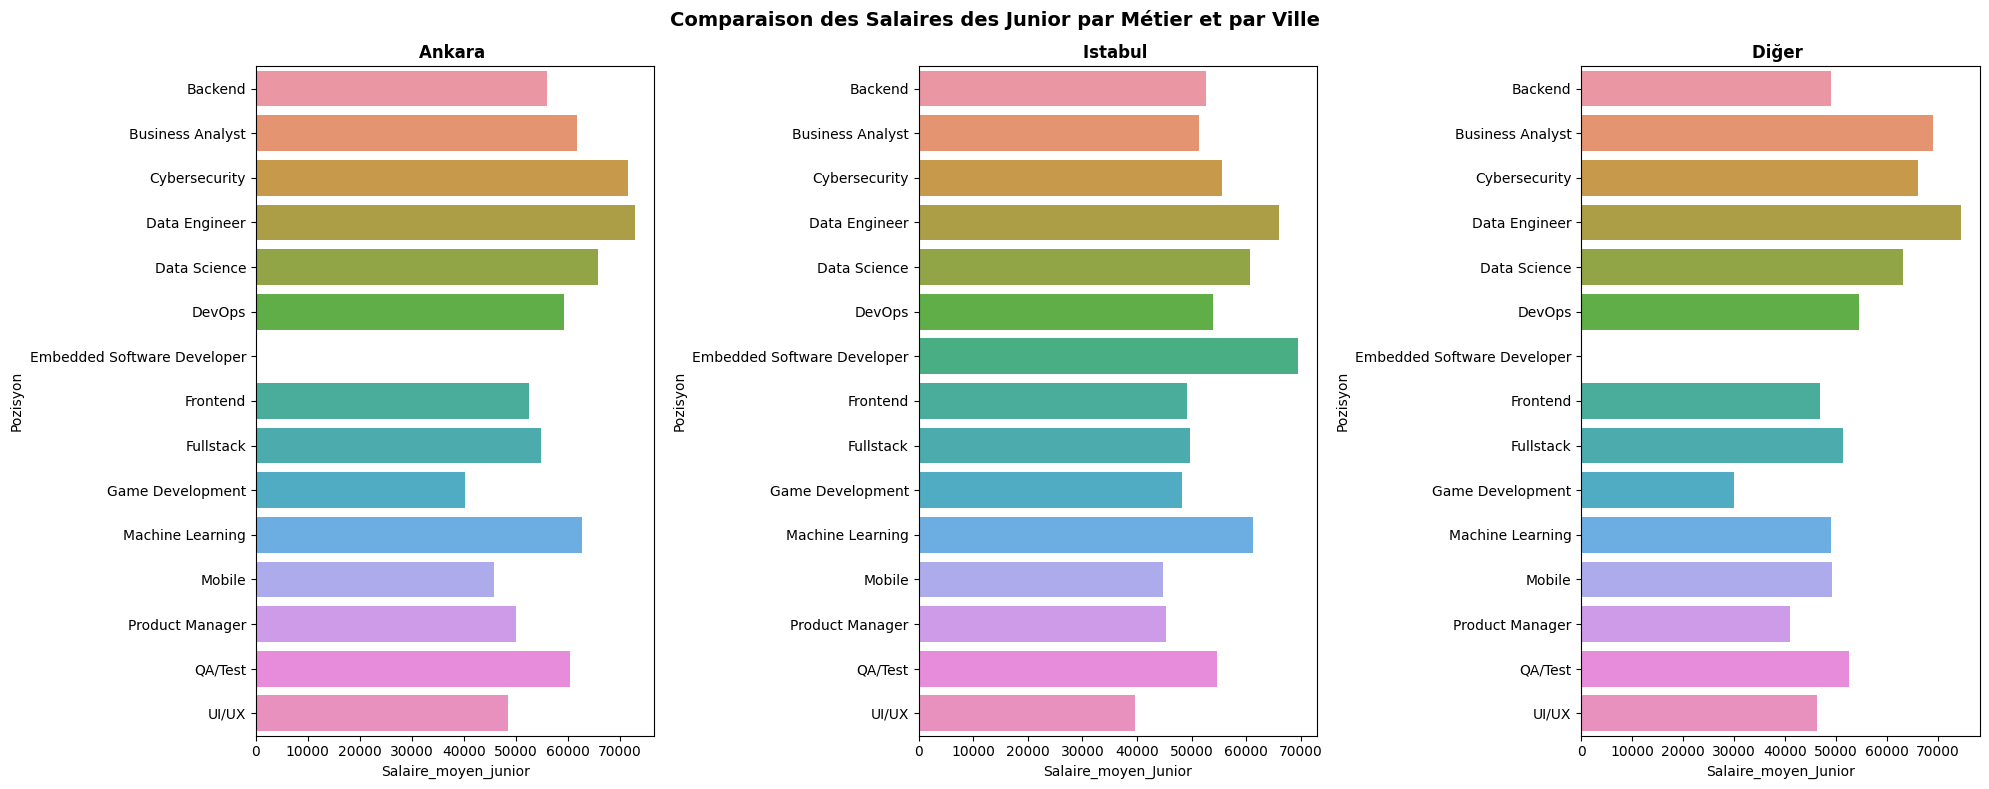

Şehir,Ankara,Diğer,Istanbul,Izmir
Pozisyon,,,,
Backend,56067.0,49062.0,52571.0,50091.0
Business Analyst,61750.0,69000.0,51333.0,0.0
Cybersecurity,71500.0,66000.0,55455.0,45000.0
Data Engineer,73000.0,74500.0,66000.0,58000.0
Data Science,65857.0,63200.0,60579.0,47000.0
DevOps,59200.0,54500.0,53941.0,52500.0
Embedded Software Developer,0.0,0.0,69500.0,0.0
Frontend,52467.0,46857.0,49061.0,40500.0
Fullstack,54900.0,51429.0,49607.0,53500.0


In [13]:
#Tableau récapitultatif des salaires par métier, ville du profil Junior 
#Graphe du profil junior par ville 
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

Ankara_pivot = pd.pivot_table(data=Ankara,index="Pozisyon",columns="Seviye",values="Maaş_Net_TL",aggfunc="mean").fillna(0).round()
Istanbul_pivot = pd.pivot_table(data=Istanbul,index="Pozisyon", columns="Seviye", values="Maaş_Net_TL",aggfunc="mean").fillna(0).round()
Diğer_pivot = pd.pivot_table(data=Diğer,index="Pozisyon", columns="Seviye", values="Maaş_Net_TL",aggfunc="mean").fillna(0).round()
sns.barplot(data=Ankara_pivot.reset_index(), x="Junior", y="Pozisyon", ax=axes[0], orient="h")
axes[0].set_title("Ankara ", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Salaire_moyen_junior")

sns.barplot(data=Istanbul_pivot.reset_index(), x="Junior", y="Pozisyon", ax=axes[1], orient="h")
axes[1].set_title("Istabul ", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Salaire_moyen_Junior")


sns.barplot(data=Diğer_pivot.reset_index(), x="Junior", y="Pozisyon", ax=axes[2], orient="h")
axes[2].set_title("Diğer ", fontsize=12, fontweight='bold')
axes[2].set_xlabel("Salaire_moyen_Junior")

plt.suptitle("Comparaison des Salaires des Junior par Métier et par Ville", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
pivot_salaire["Junior"]

En observant les salaires des profils juniors à Ankara, Diğer et Istanbul, on constate des écarts marqués selon les métiers et les zones géographiques. Ankara domine clairement pour les profils juniors les mieux rémunérés, particulièrement dans les métiers techniques liés à la data et à la cybersécurité. 
Les postes de Data Engineer (73 000 €) et Cybersecurity (71 500 €) y offrent les meilleures conditions de départ, reflétant une forte valorisation des compétences techniques dans la capitale. Data Science (65 857 €) et Machine Learning (62 800 €) complètent ce tableau avec d'excellentes perspectives d'évolution salariale.

Istanbul reste compétitive pour les domaines plus spécialisés, notamment l'Embedded Software Development (69 500 €), où les compétences rares et très recherchées justifient un niveau de salaire élevé dès le début de carrière. Diğer, quant à elle, offre des opportunités intéressantes pour les profils orientés analyse métier, avec le Business Analyst bien valorisé (69 000 €).

Ces écarts géographiques traduisent une forte demande et des perspectives de progression salariale particulièrement intéressantes au niveau junior, notamment pour les métiers techniques. La qualité du potentiel d'évolution varie selon les zones, Ankara s'imposant comme le hub privilégié pour les jeunes talents en ingénierie et data.

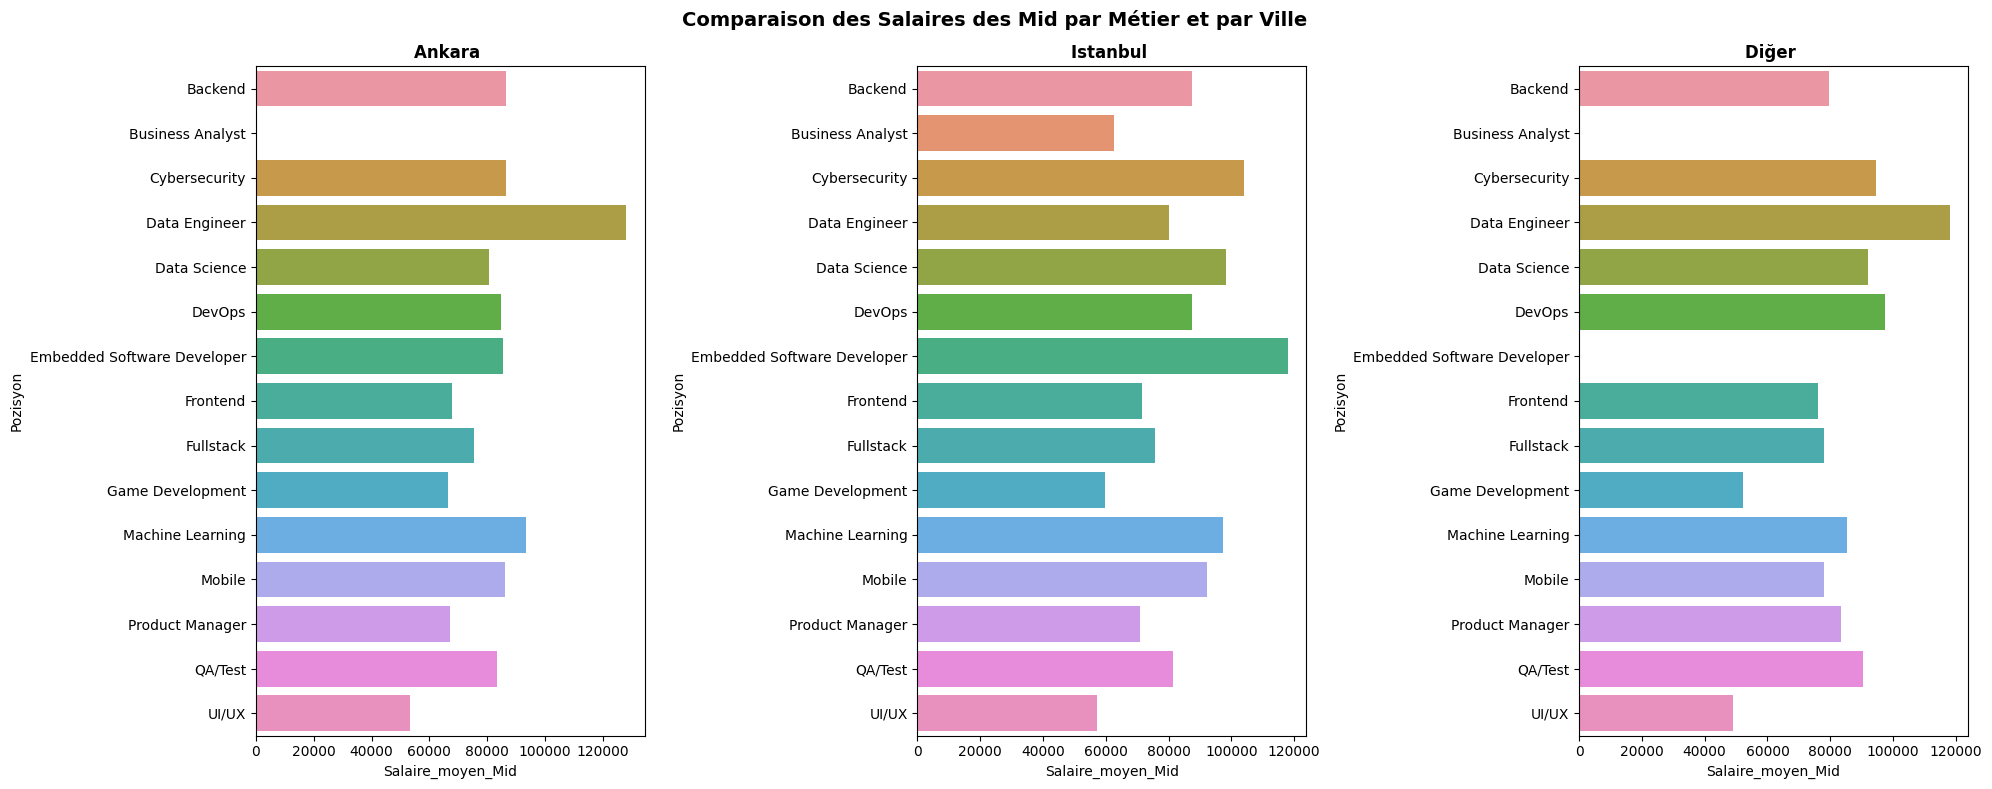

Şehir,Ankara,Diğer,Istanbul,Izmir
Pozisyon,,,,
Backend,86533.0,79526.0,87600.0,89333.0
Business Analyst,0.0,0.0,62500.0,0.0
Cybersecurity,86500.0,94667.0,104111.0,72000.0
Data Engineer,128000.0,118000.0,80000.0,0.0
Data Science,80750.0,92000.0,98400.0,98000.0
DevOps,84667.0,97500.0,87429.0,91000.0
Embedded Software Developer,85500.0,0.0,118000.0,0.0
Frontend,67875.0,76125.0,71514.0,66000.0
Fullstack,75500.0,78000.0,75700.0,64000.0


In [14]:
#Graphe des salaires des Mid par ville 

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(data=Ankara_pivot.reset_index(), x="Mid", y="Pozisyon", ax=axes[0], orient="h")
axes[0].set_title("Ankara ", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Salaire_moyen_Mid")

sns.barplot(data=Istanbul_pivot.reset_index(), x="Mid", y="Pozisyon", ax=axes[1], orient="h")
axes[1].set_title("Istanbul ", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Salaire_moyen_Mid")


sns.barplot(data=Diğer_pivot.reset_index(), x="Mid", y="Pozisyon", ax=axes[2], orient="h")
axes[2].set_title("Diğer ", fontsize=12, fontweight='bold')
axes[2].set_xlabel("Salaire_moyen_Mid")

plt.suptitle("Comparaison des Salaires des Mid par Métier et par Ville", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

pivot_salaire["Mid"]

Les salaires du profil Mid varient sensiblement entre les villes d’Ankara, Diğer et Istanbul, révélant des différences liées à la spécialisation et au dynamisme économique de chaque région. Globalement, Ankara et Istanbul se distinguent comme les pôles offrant les meilleures rémunérations moyennes, tandis que Diğer affiche des niveaux plus variables selon les métiers.

Les postes les mieux rémunérés restent ceux liés à la data et à l’intelligence artificielle, avec notamment les Data Engineers qui atteignent environ 128 000 € à Ankara et 118 000 € à Diğer, confirmant la forte valeur de ces profils techniques sur le marché. Les métiers de la cybersécurité et du Machine Learning offrent également des salaires compétitifs, dépassant souvent les 90 000 €, en particulier à Istanbul, où les Cybersecurity Engineers perçoivent en moyenne 104 111 €.

Les professions de DevOps et d’Embedded Software Developer se situent elles aussi dans une fourchette élevée, entre 85 000 € et 118 000 €, traduisant une forte demande pour les compétences en infrastructure et systèmes embarqués. À l’inverse, les métiers orientés conception ou interface utilisateur (UI/UX) et Game Development présentent des salaires nettement plus modestes, oscillant entre 49 000 € et 66 000 € selon la ville.

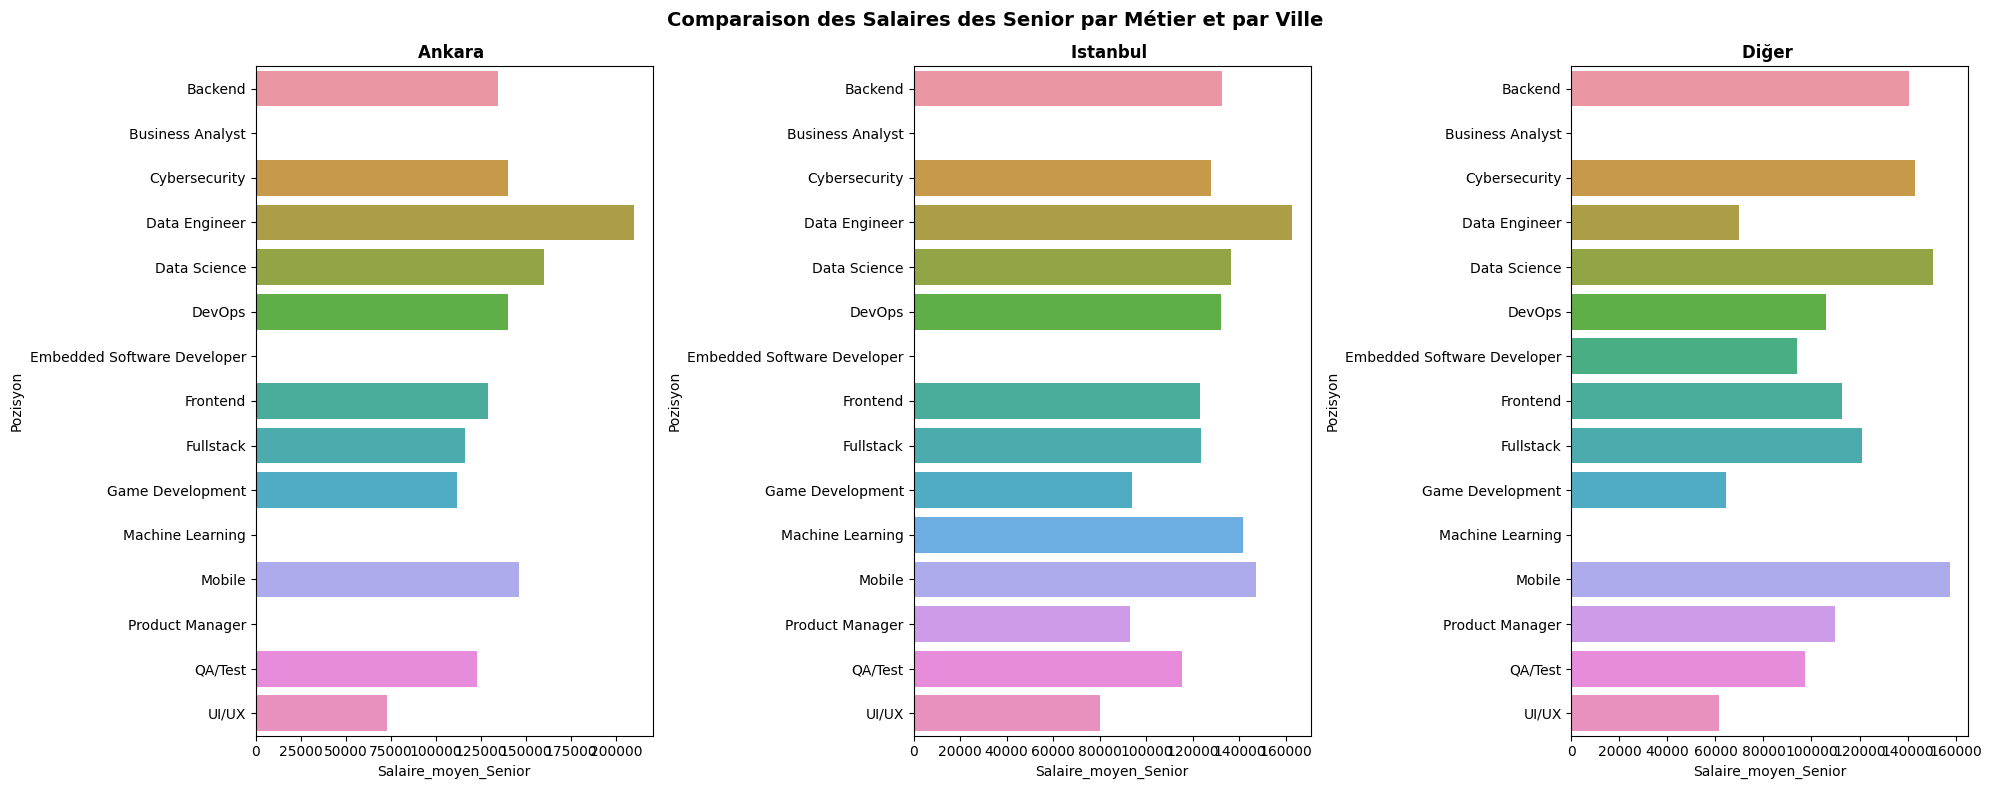

Şehir,Ankara,Diğer,Istanbul,Izmir
Pozisyon,,,,
Backend,134444.0,140571.0,132333.0,119000.0
Business Analyst,0.0,0.0,0.0,0.0
Cybersecurity,140000.0,143000.0,128000.0,144000.0
Data Engineer,210000.0,70000.0,162500.0,0.0
Data Science,160000.0,150500.0,136375.0,147500.0
DevOps,140000.0,106000.0,132250.0,0.0
Embedded Software Developer,0.0,94000.0,0.0,0.0
Frontend,129000.0,112833.0,123000.0,114833.0
Fullstack,116250.0,121000.0,123316.0,129000.0


In [15]:
#Graphe des salaires des Senior par ville

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(data=Ankara_pivot.reset_index(), x="Senior", y="Pozisyon", ax=axes[0], orient="h")
axes[0].set_title("Ankara ", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Salaire_moyen_Senior")

sns.barplot(data=Istanbul_pivot.reset_index(), x="Senior", y="Pozisyon", ax=axes[1], orient="h")
axes[1].set_title("Istanbul ", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Salaire_moyen_Senior")


sns.barplot(data=Diğer_pivot.reset_index(), x="Senior", y="Pozisyon", ax=axes[2], orient="h")
axes[2].set_title("Diğer ", fontsize=12, fontweight='bold')
axes[2].set_xlabel("Salaire_moyen_Senior")

plt.suptitle("Comparaison des Salaires des Senior par Métier et par Ville", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

pivot_salaire["Senior"]

Les résultats montrent une forte hétérogénéité des salaires seniors selon les villes et les métiers, mettant en évidence la spécialisation économique de chaque zone. Globalement, les plus hauts salaires sont observés dans les villes d’Ankara, Diğer et Istanbul, tandis qu’Izmir reste légèrement en retrait malgré de bonnes rémunérations dans certains métiers.
Les profils Data Engineer se distinguent nettement à Ankara (210 000 €) et Istanbul (162 500 €), confirmant la forte demande pour les compétences en ingénierie des données dans ces deux pôles technologiques. De même, les métiers liés à la cybersécurité affichent des salaires élevés et relativement homogènes dans toutes les villes, avec  143 000 € à Diğer, ce qui souligne la valorisation croissante de la sécurité informatique dans tout le pays.

Les postes de Data Science et de DevOps offrent également des salaires confortables, avec des niveaux supérieurs à 130 000 € dans la majorité des villes, ce qui traduit une demande soutenue pour les experts capables de gérer et d’optimiser les infrastructures technologiques. En revanche, certains métiers comme UI/UX (entre 61 000 € et 80 000 €) ou Game Development (entre 64 000 € et 112 000 €) présentent des rémunérations plus modestes et une variabilité importante selon la ville.

In [16]:
#top 10 des métiers qui rémunèrent le mieux 
SM[SM["Salaire_moyen_Net"] >= 75000 ]

,Métier,Salaire_moyen_Net
0,Backend,78742.0
2,Cybersecurity,84714.0
3,Data Engineer,105933.0
4,Data Science,90417.0
5,DevOps,80143.0
6,Embedded Software Developer,87000.0
8,Fullstack,76637.0
10,Machine Learning,88915.0
11,Mobile,82297.0
13,QA/Test,76600.0


L'analyse des salaires selon les villes, les métiers et les profils d'expérience révèle un marché de l'ingénierie particulièrement dynamique en Turquie. Istanbul, Ankara et Diğer émergent comme les principaux pôles d'employabilité du secteur.

Istanbul concentre le plus grand nombre d'emplois, tandis qu'Ankara et Diğer se distinguent par des salaires moyens supérieurs, notamment pour les postes techniques et expérimentés. Ces trois villes constituent ainsi les meilleures zones pour développer une carrière stable et bien rémunérée.

Les métiers liés à la data : Data Engineer, Data Scientist et Machine Learning Engineer , ainsi que la cybersécurité se démarquent nettement comme les plus attractifs. 
Ces professions offrent les rémunérations les plus élevées, tant au niveau junior que senior, avec une forte progression salariale en fonction de l'expérience. 
DevOps et Embedded Software Developer suivent la même dynamique, traduisant une valorisation croissante des compétences techniques et de l'expertise infrastructurelle. 
À l'inverse, les métiers orientés création et conception, comme UI/UX Design ou Game Development, présentent des salaires plus modestes et une évolution plus lente, bien qu'ils restent attrayants pour ceux qui privilégient la dimension créative.

L'étude met ainsi en lumière qu'Ankara, Istanbul et Diğer offrent les meilleures opportunités selon qu'on privilégie la rémunération ou la stabilité. Les métiers les plus rémunérateurs appartiennent aux domaines de la data, de la cybersécurité et de l'ingénierie logicielle avancée, avec une évolution particulièrement rapide pour Data Engineer, Cybersecurity Engineer, Machine Learning Engineer et QA/Test.

En définitive, les compétences techniques, la spécialisation et la localisation géographique jouent un rôle clé dans la détermination du salaire et des perspectives de carrière.